In [8]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as patches

# Kfold stuff
from sklearn.model_selection import KFold
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score
#from sklearn.metrics import accuracy_score, balanced_accuracy_score, log_loss, make_scorer
#from sklearn.metrics import roc_curve, auc
from sklearn import preprocessing

# For optimizing hyper parameters
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from bayes_opt import BayesianOptimization

# For selecting features
import shap

# For creating loading bars and measuring time
from tqdm.notebook import tqdm
import time

# Statistical distributions
from scipy import stats

# Reading the data

In [3]:
import h5py

def load_data(name):
    with h5py.File(f'{name}.h5', 'r') as f:
        return pd.DataFrame(f[name][:])

train = load_data('train')
test  = load_data('test')

In [4]:
print (f'Shape of training data set: {train.shape}')
print (f'Shape of test data set: {test.shape}')

Shape of training data set: (162500, 166)
Shape of test data set: (160651, 164)


In [5]:
all_variables = ['actualInteractionsPerCrossing', 'averageInteractionsPerCrossing', 'correctedActualMu', 'correctedAverageMu', 'correctedScaledActualMu', 'correctedScaledAverageMu', 'NvtxReco', 'p_nTracks', 'p_pt_track', 'p_eta', 'p_phi', 'p_charge', 'p_qOverP', 'p_z0', 'p_d0', 'p_sigmad0', 'p_d0Sig', 'p_EptRatio', 'p_dPOverP', 'p_z0theta', 'p_etaCluster', 'p_phiCluster', 'p_eCluster', 'p_rawEtaCluster', 'p_rawPhiCluster', 'p_rawECluster', 'p_eClusterLr0', 'p_eClusterLr1', 'p_eClusterLr2', 'p_eClusterLr3', 'p_etaClusterLr1', 'p_etaClusterLr2', 'p_phiClusterLr2', 'p_eAccCluster', 'p_f0Cluster', 'p_etaCalo', 'p_phiCalo', 'p_eTileGap3Cluster', 'p_cellIndexCluster', 'p_phiModCalo', 'p_etaModCalo', 'p_dPhiTH3', 'p_R12', 'p_fTG3', 'p_weta2', 'p_Reta', 'p_Rphi', 'p_Eratio', 'p_f1', 'p_f3', 'p_Rhad', 'p_Rhad1', 'p_deltaEta1', 'p_deltaPhiRescaled2', 'p_TRTPID', 'p_TRTTrackOccupancy', 'p_numberOfInnermostPixelHits', 'p_numberOfPixelHits', 'p_numberOfSCTHits', 'p_numberOfTRTHits', 'p_numberOfTRTXenonHits', 'p_chi2', 'p_ndof', 'p_SharedMuonTrack', 'p_E7x7_Lr2', 'p_E7x7_Lr3', 'p_E_Lr0_HiG', 'p_E_Lr0_LowG', 'p_E_Lr0_MedG', 'p_E_Lr1_HiG', 'p_E_Lr1_LowG', 'p_E_Lr1_MedG', 'p_E_Lr2_HiG', 'p_E_Lr2_LowG', 'p_E_Lr2_MedG', 'p_E_Lr3_HiG', 'p_E_Lr3_LowG', 'p_E_Lr3_MedG', 'p_ambiguityType', 'p_asy1', 'p_author', 'p_barys1', 'p_core57cellsEnergyCorrection', 'p_deltaEta0', 'p_deltaEta2', 'p_deltaEta3', 'p_deltaPhi0', 'p_deltaPhi1', 'p_deltaPhi2', 'p_deltaPhi3', 'p_deltaPhiFromLastMeasurement', 'p_deltaPhiRescaled0', 'p_deltaPhiRescaled1', 'p_deltaPhiRescaled3', 'p_e1152', 'p_e132', 'p_e235', 'p_e255', 'p_e2ts1', 'p_ecore', 'p_emins1', 'p_etconeCorrBitset', 'p_ethad', 'p_ethad1', 'p_f1core', 'p_f3core', 'p_maxEcell_energy', 'p_maxEcell_gain', 'p_maxEcell_time', 'p_maxEcell_x', 'p_maxEcell_y', 'p_maxEcell_z', 'p_nCells_Lr0_HiG', 'p_nCells_Lr0_LowG', 'p_nCells_Lr0_MedG', 'p_nCells_Lr1_HiG', 'p_nCells_Lr1_LowG', 'p_nCells_Lr1_MedG', 'p_nCells_Lr2_HiG', 'p_nCells_Lr2_LowG', 'p_nCells_Lr2_MedG', 'p_nCells_Lr3_HiG', 'p_nCells_Lr3_LowG', 'p_nCells_Lr3_MedG', 'p_pos', 'p_pos7', 'p_poscs1', 'p_poscs2', 'p_ptconeCorrBitset', 'p_ptconecoreTrackPtrCorrection', 'p_r33over37allcalo', 'p_topoetconeCorrBitset', 'p_topoetconecoreConeEnergyCorrection', 'p_topoetconecoreConeSCEnergyCorrection', 'p_weta1', 'p_widths1', 'p_widths2', 'p_wtots1', 'p_e233', 'p_e237', 'p_e277', 'p_e2tsts1', 'p_ehad1', 'p_emaxs1', 'p_fracs1', 'p_DeltaE', 'p_E3x5_Lr0', 'p_E3x5_Lr1', 'p_E3x5_Lr2', 'p_E3x5_Lr3', 'p_E5x7_Lr0', 'p_E5x7_Lr1', 'p_E5x7_Lr2', 'p_E5x7_Lr3', 'p_E7x11_Lr0', 'p_E7x11_Lr1', 'p_E7x11_Lr2', 'p_E7x11_Lr3', 'p_E7x7_Lr0', 'p_E7x7_Lr1' ]

In [6]:
# Train sample
X_unscaled = train[all_variables]
y_truth = train['Truth']
y_energy = train['p_truth_E']

# Test sample
X_test_unscaled = test[all_variables]

print (f'Shape of X: {X_unscaled.shape}')
print (f'Shape of y_truth: {y_truth.shape}')
print (f'Shape of y_energy: {y_energy.shape}')
print (f'Shape of X_test: {X_test_unscaled.shape}')

Shape of X: (162500, 160)
Shape of y_truth: (162500,)
Shape of y_energy: (162500,)
Shape of X_test: (160651, 160)


# Scaling the data

We have 160 variables all with different distributions and different ranges of values, we therefor need to scale the data before we use it to train, so that one parameter will not dominate due to large values or something like that.

There are many way to scale the data each method being better for a certain distribution of data or special features of data or the model that we want to run. Since we have so many different variables I will use what I consider the most simple: RobustScaler. It is possible that we should scale each column differently but that seems like overkill, so lets stick with this. We create our scala by fitting to the train data, we then also scale our test data, that we will use in the end.

First we want to only train on electrons, so lets select those, before we scale anything. Notice we only remove non-electrons from the train set since we don't know the labels of the test data and want to make predictions for all.

In [13]:
# Data containing only electrons
mask = (y_truth==True)
X_unscaled_electrons = X_unscaled[mask]
y_energy = y_energy[mask]
X_unscaled_electrons.shape, y_energy.shape

((121495, 160), (121495,))

In [14]:
#X = preprocessing.normalize(X_unscaled, norm='l2', axis=0)
scaler = preprocessing.RobustScaler().fit(X_unscaled_electrons)
X = scaler.transform(X_unscaled_electrons)

# Scale test sample
X_test = scaler.transform(X_test_unscaled)

# Find 15 most important physical parameters (SHAP)

There are 160 variables for each event, which is way to much. We need to pick at most the 15 most important ones, that means the ones that makes the largest cut in the tree based model, i.e. classifies the most events with one cut. There are multiple ways to do this. XGBOOST has a built in feauture_importance that gives a score for how important the physical parameters are (based on the effect of a permutation of a columns value on the loss function). 

Another way to do this is with SHAP which is based on game theory. We will go with SHAP.

In [15]:
# Split data into train set and validation set
X_train, X_val, y_train, y_val = train_test_split(X, y_energy, test_size=0.33, random_state=1)

Which objective should we use? squared error or logistic?

In [18]:
# Train model
model = xgb.XGBRegressor(objective='reg:squarederror', eval_metric='mae', random_state=1, 
                          use_label_encoder=False)
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eval_metric='mae', gamma=0,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=1,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', use_label_encoder=False,
             validate_parameters=1, verbosity=None)

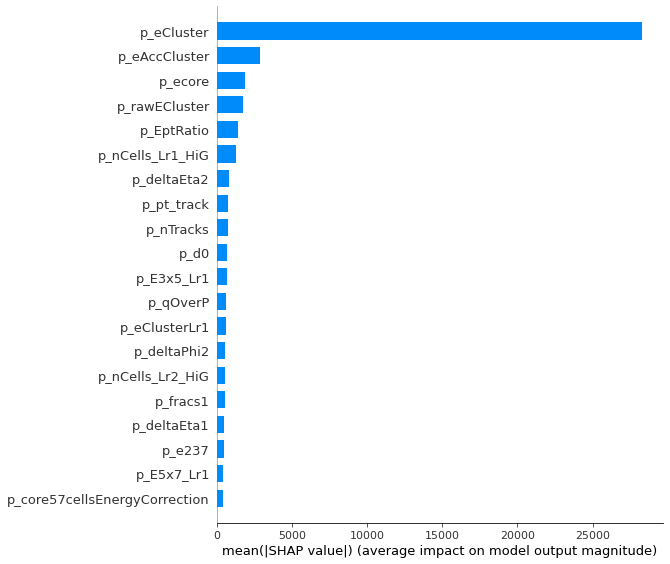

In [19]:
# Run shap to get the most important parameters
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

# Plot them
shap.summary_plot(shap_values, X_val, plot_type="bar", feature_names=all_variables)

In [20]:
# Get mean shap values for 15 best parameters
mean_shap = np.mean(abs(shap_values), axis=0)
sort_idx = np.argsort(mean_shap)
sort_shap = mean_shap[sort_idx][-15:][::-1]
sort_shap_var = np.array(all_variables)[sort_idx][-15:][::-1]

# Display the values
shap_val25 = pd.Series( (sort_shap), index=sort_shap_var  )
display(shap_val25)

p_eCluster          28288.076172
p_eAccCluster        2903.275635
p_ecore              1842.385864
p_rawECluster        1722.445068
p_EptRatio           1395.595947
p_nCells_Lr1_HiG     1279.532349
p_deltaEta2           807.145142
p_pt_track            754.970337
p_nTracks             742.677734
p_d0                  687.000732
p_E3x5_Lr1            672.241821
p_qOverP              621.959534
p_eClusterLr1         607.984619
p_deltaPhi2           556.884827
p_nCells_Lr2_HiG      537.734619
dtype: float32

Now let's choose how many parameters we will include in the model. There are different things to consider here: accuracy and computing time. Lets look into this.

In [30]:
# Set how many parameters we will test out
n_params = [3,4,5,6,8,10,12,15]

# Empty arrays to store values
loss_arr = []
computer_time = []

# Make X a pandas dataframe so we can use variable names to slice
df_X = pd.DataFrame((X), columns=all_variables )

# Loop over number of parameters used in a model
for n in tqdm(n_params):
    
    # Make a new X (input data containing 20 best parameters)
    X_temp = df_X[sort_shap_var[:n]]
    
    # Split test data and train data
    X_train, X_val, y_train, y_val = train_test_split(X_temp, y_energy, test_size=0.33, random_state=2)
    
    # Train model and time it
    model = xgb.XGBRegressor(objective='reg:squarederror', eval_metric='mae', random_state=2, 
                          use_label_encoder=False, max_depth=6, n_estimators=100, learning_rate=0.3)
    t0 = time.process_time()
    model.fit(X_train, y_train)
    t = time.process_time() - t0
    computer_time.append(t)
    
    # Get MAE score (negative one so we have to take the absolute value of the score that comes out)
    MAE = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=5)
    loss_arr.append(abs(MAE.mean()))

  0%|          | 0/8 [00:00<?, ?it/s]

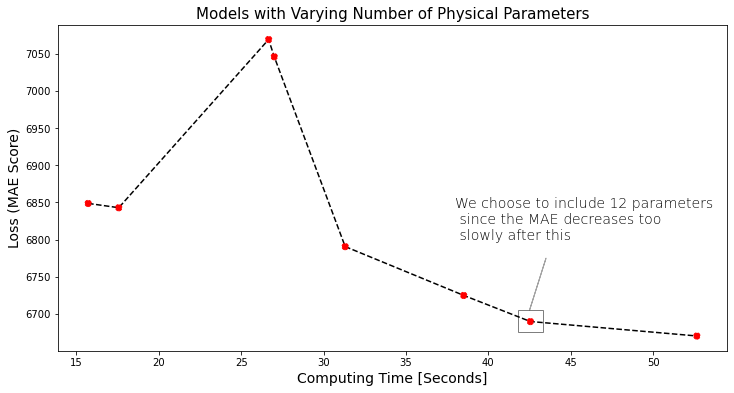

In [73]:
# Plot the result
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(computer_time, loss_arr, color='k', linestyle='dashed', zorder=1)
ax.scatter(computer_time, loss_arr, color='r', linestyle='dashed', zorder=2, s=40)
ax.set_ylabel('Loss (MAE Score)',fontsize=14)
ax.set_xlabel('Computing Time [Seconds]',fontsize=14)

# Mark the number of parameters we use
rect = plt.Rectangle((41.8, 6675), 1.5, 30, color='k', alpha=0.5, fill=False)
ax.add_patch(rect)
line = plt.arrow(42.5, 6705, 1, 70, width=0.000000001, color='k', alpha=0.2)
ax.add_patch(line)
text = 'We choose to include 12 parameters \n since the MAE decreases too \n slowly after this'
ax.text(38, 6800, text, fontsize=14, weight='light') 
ax.set_title('Models with Varying Number of Physical Parameters', fontsize=15)
plt.show()

In [115]:
# Create a input with the 12 best parameters both train and test set
df_X = pd.DataFrame((X), columns=all_variables )
X = df_X[sort_shap_var[:12]]

df_X_test = pd.DataFrame((X_test), columns=[all_variables])
X_test = df_X_test[sort_shap_var[:12]]

# Optimizing hyper parameters with Random Search (5 fold cv)
We optimize according to the MAE metric that we are evaluated on

In [116]:
# Specify parameters and distributions to sample from
parameters_RandomSearch = {'max_depth': stats.randint(1,10), 
                           'n_estimators': stats.randint(1, 400)}

# Chose number of iterations and number of folds
n_iter_search = 10
k = 5

# Decide model configurations
model = xgb.XGBRegressor(objective='reg:squarederror', eval_metric='mae', random_state=2, 
                          use_label_encoder=False, learning_rate=0.3)

RandomSearch = RandomizedSearchCV(model, 
                                  param_distributions=parameters_RandomSearch, 
                                  n_iter=n_iter_search, 
                                  cv=k, 
                                  return_train_score=True,
                                  random_state=1,
                                  scoring = 'neg_mean_absolute_error')

# Fit the random search instance
RandomSearch.fit(X, y_energy);

In [117]:
# Get results
RandomSearch_results = pd.DataFrame(RandomSearch.cv_results_)                 
print("Random Search: \tBest parameters: ", RandomSearch.best_params_, f", Best scores: {RandomSearch.best_score_:.3f}")

RandomSearch_results.head(5)

Random Search: 	Best parameters:  {'max_depth': 3, 'n_estimators': 277} , Best scores: -6629.249


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,30.443087,0.670158,0.053368,0.000614,6,236,"{'max_depth': 6, 'n_estimators': 236}",-6757.545410,-6773.917480,-6683.254883,...,-6727.682715,44.408748,3,-5300.387695,-5252.617676,-5308.079590,-5280.443359,-5283.933105,-5285.092285,19.182921
1,52.775447,1.748060,0.101267,0.019863,9,256,"{'max_depth': 9, 'n_estimators': 256}",-7066.833008,-7017.869141,-7022.435059,...,-7040.105469,22.112734,9,-3593.109131,-3618.347412,-3566.884521,-3597.323730,-3570.610596,-3589.255078,18.838149
2,44.413578,1.071061,0.077432,0.007879,6,336,"{'max_depth': 6, 'n_estimators': 336}",-6821.890625,-6830.248047,-6750.813477,...,-6792.384180,41.014891,4,-5002.711426,-4958.478516,-5017.623047,-4996.196289,-4977.243164,-4990.450488,20.583164
3,3.597408,0.022398,0.012719,0.000098,1,145,"{'max_depth': 1, 'n_estimators': 145}",-7524.847168,-7478.553711,-7397.684082,...,-7475.521973,52.207596,10,-7427.166016,-7422.363281,-7436.713379,-7451.031250,-7429.460449,-7433.346875,9.980152
4,3.331469,0.017429,0.011594,0.000030,2,72,"{'max_depth': 2, 'n_estimators': 72}",-6950.330566,-6956.642578,-6848.819824,...,-6927.186133,43.465881,8,-6825.704590,-6883.385742,-6863.198730,-6863.788574,-6861.328125,-6859.481152,18.697974


In [118]:
# Save the parameters
max_depth_RS = RandomSearch.best_params_['max_depth']
n_estimators_RS = RandomSearch.best_params_['n_estimators']

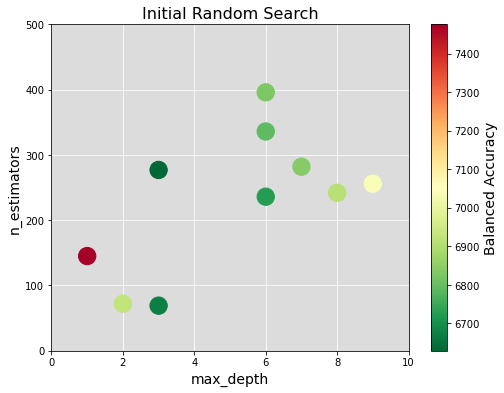

In [119]:
# Visualize the results
fig, ax = plt.subplots(figsize=(8,6))

# Get parameters
x1 = RandomSearch_results['param_max_depth']
x2 = RandomSearch_results['param_n_estimators']
color = -RandomSearch_results['mean_test_score']

# Invert cmap so low value is green
color_map = plt.cm.get_cmap('RdYlGn')
reversed_color_map = color_map.reversed()

# Plot initial random search
im = ax.scatter(x1, x2, s=300, c = color, cmap=reversed_color_map, zorder=2)
ax.set_facecolor('gainsboro')
ax.grid(color='w', zorder=0)
ax.set_xlabel('max_depth', fontsize=14)
ax.set_ylabel('n_estimators', fontsize=14)
ax.set_title('Initial Random Search', fontsize=16)
ax.set_xlim(0,10)
ax.set_ylim(0,500)

# Shared colorbar
cbar = fig.colorbar(im, ax=ax)
cbar.set_label('Balanced Accuracy', fontsize=14, x=1.7)

plt.show()

# Create the final model and inspect results
We choose the optimized hyper parameters from the random search along with the physical parameters deemed important by SHAP and our evaluation of computer time.

In [120]:
# Split into train data and validation data
X_train, X_val, y_train, y_val = train_test_split(X, y_energy, test_size=0.2, random_state=1)

In [121]:
# Set up model
model_RS = xgb.XGBRegressor(objective='reg:squarederror', eval_metric='mae', random_state=1, learning_rate=0.1,
                          use_label_encoder=False, max_depth=max_depth_RS, n_estimators=n_estimators_RS)

# Train model on train set
model_RS.fit(X_train, y_train)

# Evaluate the MAE loss by 5 fold cross validation
loss_RS = cross_val_score(model_RS, X_val, y_val, scoring='neg_mean_absolute_error', cv=5)

In [122]:
# Get the MAE loss score
print(-loss_RS.mean())

6746.34267578125


The best so far, it seems our model is doing well. Lets however make the predictions and inspect them for the validation set.

In [123]:
# Make predictions for validation set
predictions_val = model_RS.predict(X_val)

Lets plot the predictions along with the ground truth energy for all particles.

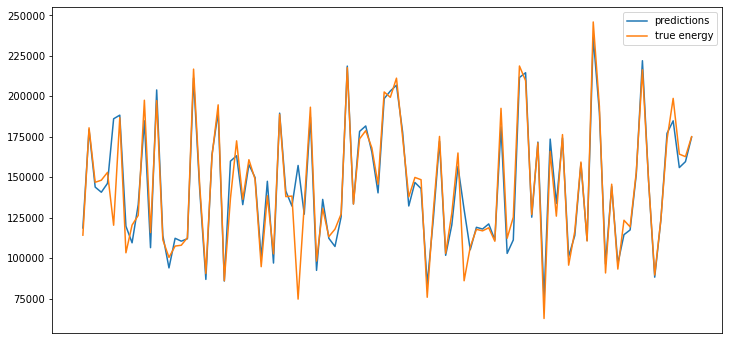

In [140]:
# Plot the first 100 predictions along with true energy
fig, ax = plt.subplots(figsize=(12,6))

x_array = np.arange(100)
ax.plot(x_array, predictions_val[:100], label='predictions')
ax.plot(x_array, y_val[:100], label='true energy')
ax.get_xaxis().set_visible(False)
ax.legend()
plt.show()

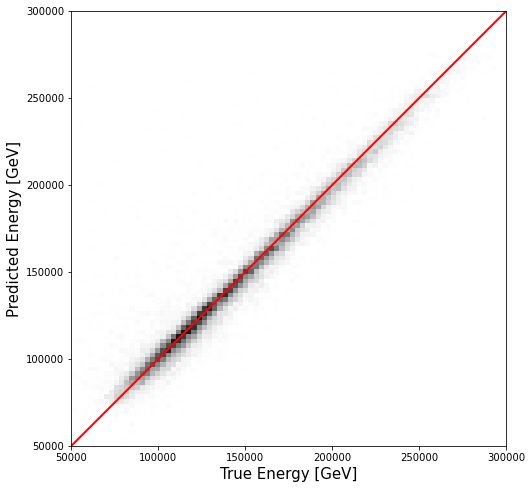

In [156]:
# Plot in a 2d histogram predictions and ground truth
fig, ax = plt.subplots(figsize=(8,8))

# Plot histogram
ax.hist2d(y_val, predictions_val, bins=(100,100), cmap='binary')
ax.set_ylim(50000,300000)
ax.set_xlim(50000,300000)
ax.set_aspect('equal')
ax.set_xlabel('True Energy [GeV]', fontsize=15)
ax.set_ylabel('Predicted Energy [GeV]', fontsize=15)

# Plot desired line
ax.plot((50000,300000), (50000,300000), color='r', linewidth=2)

plt.show()

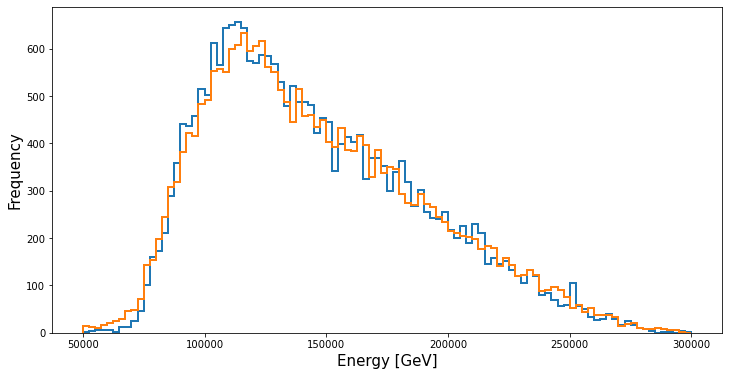

In [164]:
# Let's look at the 1D distribution
fig, ax = plt.subplots(figsize=(12,6))

ax.hist(predictions_val, bins=100, range=(50000,300000), histtype='step', linewidth=2, label='predictions')
ax.hist(y_val, bins=100, range=(50000,300000), histtype='step', linewidth=2, label='true energy')
ax.set_xlabel('Energy [GeV]', fontsize=15)
ax.set_ylabel('Frequency', fontsize=15)
plt.show()

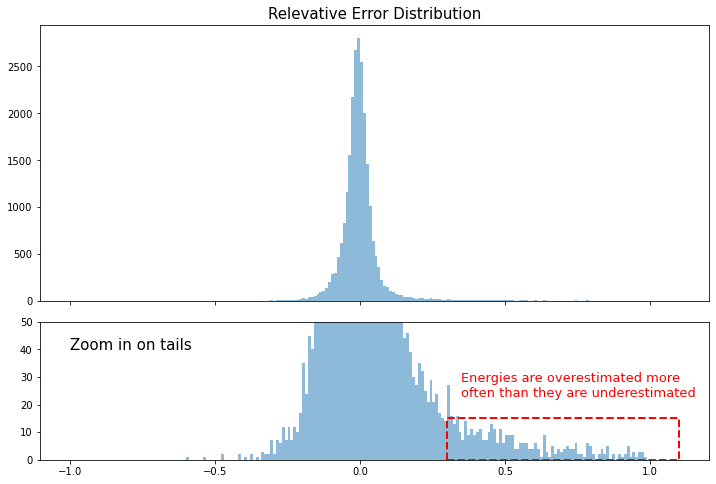

In [249]:
# Lets plot the relative error distribution (P-T)/T

# Get relativ epercentage error
rel_err = (predictions_val-y_val) / y_val

# Plot rel err
fig, ax = plt.subplots(nrows=2, figsize=(12,8), gridspec_kw={'height_ratios':(2,1), 'hspace':0.1},
                      sharex=True)
bins = np.arange(-1,1, 0.01)
ax[0].hist(rel_err, range=(-5,5), bins=bins, alpha=0.5)
ax[0].set_title('Relevative Error Distribution',fontsize=15)

# Plot zoom
ax[1].hist(rel_err, range=(-5,5), bins=bins, alpha=0.5)
ax[1].set_ylim(0,50)
ax[1].text(-1,40,'Zoom in on tails', fontsize=15)

# Mark left tail
rect = patches.Rectangle((0.3,0), 0.8, 15, linewidth=2, edgecolor='r', facecolor='none', linestyle='dashed')
ax[1].add_patch(rect)
ax[1].text(0.35,23,'Energies are overestimated more \noften than they are underestimated', color='r', fontsize=13)

plt.show()

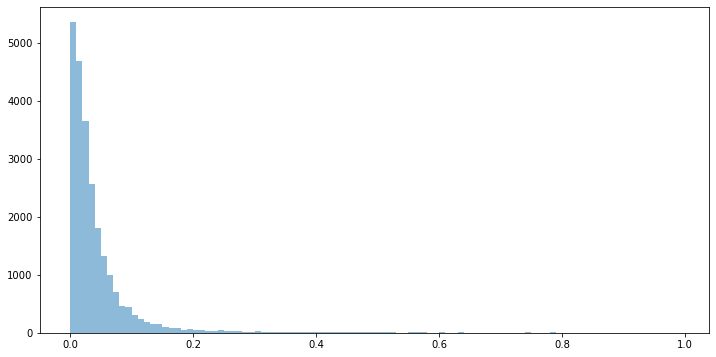

In [263]:
# Absolute relative error distribution
abs_rel_err = abs(rel_err)

# Plot it
fig, ax = plt.subplots(figsize=(12,6))

bins = np.arange(0,1, 0.01)
ax.hist(abs_rel_err, bins=bins, alpha=0.5)

plt.show()

In [273]:
# Lets calculate the MAE on the relative deviation
mean_abs_err = np.mean(abs_rel_err-0)
print('MAE of relative deviation for all data:', mean_abs_err)

# Lets look at percentiles of the data to see when the outliers come in
percentile_cuts = np.percentile(abs_rel_err, [68, 95, 99.7]) # Within 1,2 and 3 standard deviation
   
# Get MAE of relative deivation for 68%, 95% and 99.7% of the data
mean_abs_err_percentiles = []
                                                         
for i in range(3):
    mask = (abs_rel_err <= percentile_cuts[i])
    mae = np.mean(abs_rel_err[mask])
    mean_abs_err_percentiles.append(mae)
    
print('MAE of relative deviation for 68 percentile:', mean_abs_err_percentiles[0])
print('MAE of relative deviation for 95 percentile:', mean_abs_err_percentiles[1])
print('MAE of relative deviation for 99.7 percentile:', mean_abs_err_percentiles[2])

MAE of relative deviation for all data: 0.06485576182603836
MAE of relative deviation for 68 percentile: 0.017348263412714005
MAE of relative deviation for 95 percentile: 0.03309744596481323
MAE of relative deviation for 99.7 percentile: 0.05148998275399208


# Make predictions + produce csv files

In [275]:
# Make predictions on test data
final_predictions = model_RS.predict(X_test)

In [279]:
# Make pandas dataframe
final_predictions = pd.DataFrame(final_predictions, columns=['energy prediction in GeV'])

# Make csv file with predictions
file_name = 'Regression_KimiKreilgaard_XGBoostRegressor.txt'
final_predictions.to_csv('Solutions/'+file_name, sep=',', header=None, index=True, mode='w')

In [281]:
# Make csv file with parameters used
file_name = 'Regression_KimiKreilgaard_XGBoostRegressor_VariableList.txt'

outfile = open('Solutions/'+file_name, 'w')

for var in sort_shap_var[:12]:
    outfile.write(var+'\n')